In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
# from sklearn.svm import LinearSVC
# from sklearn.datasets import load_iris
# from sklearn.feature_selection import SelectFromModel
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# from sklearn.ensemble import ExtraTreesClassifier
workdir = ".//kkim//"
os.getcwd()

Using TensorFlow backend.


'D:\\IC50 ANALYSIS'

In [2]:
toyset = np.load('file_path//test_toysets.npz') # Load datasets for predicting (example is toysets)

In [3]:
test_x, test_y = toyset['x'], toyset['y'] # Assignment each variable of datasets

In [4]:
toy_X.shape # The shape of variables 

In [5]:
test_in_epoch = 0
test_num_examples = test_x.shape[0]
batch_size2 = 25
# for splitting out batches of data
def test_next_batch(batch_size2):
    global test_in_epoch
    
    start = test_in_epoch
    test_in_epoch += batch_size2
    end = test_in_epoch
    

            # when all trainig data have been already used, it is reorder randomly    
    if test_in_epoch > test_num_examples:   
                # start next epoch
        end = test_num_examples     
    return test_x[start:end], test_y[start:end]

In [6]:
StartTime5 = datetime.now()
print("StartTime :", StartTime5)
tf.reset_default_graph()
tf.set_random_seed(191018)
learning_rate = 0.0001
training_epochs = 100
batch_size = 125
keep_prob = tf.placeholder(tf.float32)
predicted = []
observed = []
accHist2 = []
predict_probabilities = []
observed_probabilities = []
num_classes = 3

StartTime : 2019-10-28 15:01:51.220694


In [7]:
batch_prob = tf.placeholder(tf.bool)

In [8]:
X = tf.placeholder(tf.float32, [None, 27889])
Y = tf.placeholder(tf.float32, [None, 3])

In [9]:
X_image = tf.reshape(X, [-1, 167, 167, 1])
    
with tf.name_scope('conv_1'):
    W1 = tf.Variable(tf.truncated_normal([11, 11, 1, 16], stddev=0.01, dtype=tf.float32), name = 'W1')
    L1 = tf.nn.conv2d(X_image, W1, strides=[1, 1, 1, 1], padding='SAME')
    L1 = tf.layers.batch_normalization(L1, center=True, scale=True, training=batch_prob)
    L1 = tf.nn.relu(L1)

In [10]:
with tf.name_scope('conv_2'):
    W2 = tf.Variable(tf.truncated_normal([11, 11, 16, 16], stddev=0.01, dtype=tf.float32), name = 'W2')
    L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
    L2 = tf.layers.batch_normalization(L2, center=True, scale=True, training=batch_prob)
    L2 = tf.nn.relu(L2)

In [11]:
with tf.name_scope('pool_1'):
    L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
#     L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

In [12]:
with tf.name_scope('conv_3'):
    W3 = tf.Variable(tf.truncated_normal([11, 11, 16, 32], stddev=0.01, dtype=tf.float32), name = 'W3')
    L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
    L3 = tf.layers.batch_normalization(L3, center=True, scale=True, training=batch_prob)
    L3 = tf.nn.relu(L3)

In [13]:
with tf.name_scope('conv_4'):
    W4 = tf.Variable(tf.truncated_normal([11, 11, 32, 32], stddev=0.01, dtype=tf.float32), name = 'W4')
    L4 = tf.nn.conv2d(L3, W4, strides=[1, 1, 1, 1], padding='SAME')
    L4 = tf.layers.batch_normalization(L4, center=True, scale=True, training=batch_prob)
    L4 = tf.nn.relu(L4)

In [14]:
with tf.name_scope('pool_2'):
    L4 = tf.nn.max_pool(L4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
#     L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

In [15]:
with tf.name_scope('conv_5'):
    W5 = tf.Variable(tf.truncated_normal([11, 11, 32, 64], stddev=0.01, dtype=tf.float32), name = 'W5')
    L5 = tf.nn.conv2d(L4, W5, strides=[1, 1, 1, 1], padding='SAME')
    L5 = tf.layers.batch_normalization(L5, center=True, scale=True, training=batch_prob)
    L5 = tf.nn.relu(L5)

In [16]:
with tf.name_scope('conv_6'):
    W6 = tf.Variable(tf.truncated_normal([11, 11, 64, 64], stddev=0.01, dtype=tf.float32), name = 'W6')
    L6 = tf.nn.conv2d(L5, W6, strides=[1, 1, 1, 1], padding='SAME')
    L6 = tf.layers.batch_normalization(L6, center=True, scale=True, training=batch_prob)
    L6 = tf.nn.relu(L6)

In [17]:
with tf.name_scope('pool_3'):
    L6 = tf.nn.max_pool(L6, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
#     L6 = tf.nn.dropout(L6, keep_prob=keep_prob)

In [18]:
with tf.name_scope('conv_7'):
    W7 = tf.Variable(tf.truncated_normal([11, 11, 64, 128], stddev=0.01, dtype=tf.float32), name = 'W7')
    L7 = tf.nn.conv2d(L6, W7, strides=[1, 1, 1, 1], padding='SAME')
    L7 = tf.layers.batch_normalization(L7, center=True, scale=True, training=batch_prob)
    L7 = tf.nn.relu(L7)

In [19]:
with tf.name_scope('pool_4'):
    L7 = tf.nn.max_pool(L7, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
#     L6 = tf.nn.dropout(L6, keep_prob=keep_prob)

In [20]:
with tf.name_scope('conv_8'):
    W8 = tf.Variable(tf.truncated_normal([11, 11, 128, 128], stddev=0.01, dtype=tf.float32), name = 'W8')
    L8 = tf.nn.conv2d(L7, W8, strides=[1, 1, 1, 1], padding='SAME')
    L8 = tf.layers.batch_normalization(L8, center=True, scale=True, training=batch_prob)
    L8 = tf.nn.relu(L8)

In [21]:
with tf.name_scope('flat'):
    L8_flat = tf.reshape(L8, [-1, 128 * 11 * 11])

In [22]:
with tf.name_scope('fc_1') as scope:
    W9 = tf.get_variable("W9", shape=[128 * 11 * 11, 8192], initializer=tf.contrib.layers.xavier_initializer())
    b9 = tf.Variable(tf.constant(0.1, shape=[8192]), name = 'b9')
    L9 = tf.layers.batch_normalization(L8_flat , center=True, scale=True, training=batch_prob)
    L9 = tf.nn.relu(tf.matmul(L9, W9) + b9)
#     L9 = tf.nn.dropout(L9, keep_prob=keep_prob)

In [23]:
with tf.name_scope('fc_2') as scope:
    W10 = tf.get_variable("W10", shape=[8192, 4096], initializer=tf.contrib.layers.xavier_initializer())
    b10 = tf.Variable(tf.truncated_normal([4096]), name = 'b10')
    L10 = tf.layers.batch_normalization(L9 , center=True, scale=True, training=batch_prob)
    L10 = tf.nn.relu(tf.matmul(L10, W10) + b10)
#     L10 = tf.nn.dropout(L10, keep_prob=keep_prob)

In [24]:
with tf.name_scope('fc_3') as scope:
    W11 = tf.get_variable("W11", shape=[4096, 2048], initializer=tf.contrib.layers.xavier_initializer())
    b11 = tf.Variable(tf.truncated_normal([2048]), name = 'b11')
    L11 = tf.layers.batch_normalization(L10 , center=True, scale=True, training=batch_prob)
    L11 = tf.nn.relu(tf.matmul(L11, W11) + b11)
#     L11 = tf.nn.dropout(L11, keep_prob=keep_prob)

In [25]:
with tf.name_scope('fc_4') as scope:
    W12 = tf.get_variable("W12", shape=[2048, 1024], initializer=tf.contrib.layers.xavier_initializer())
    b12 = tf.Variable(tf.truncated_normal([1024]), name = 'b12')
    L12 = tf.layers.batch_normalization(L11 , center=True, scale=True, training=batch_prob)
    L12 = tf.nn.relu(tf.matmul(L12, W12) + b12)
#     L12 = tf.nn.dropout(L12, keep_prob=keep_prob)

In [26]:
with tf.name_scope('fc_5') as scope:
    W18 = tf.get_variable("W18", shape=[1024, 3], initializer=tf.contrib.layers.xavier_initializer())
    b18 = tf.Variable(tf.constant(0.1, shape=[3]), name = 'b18')
    L18 = tf.layers.batch_normalization(L12 , center=True, scale=True, training=batch_prob)
    logits = tf.matmul(L18, W18) + b18
    Ylogit = tf.nn.softmax(logits)

In [27]:
with tf.name_scope('cost'):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
    
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(Ylogit, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [28]:
SAVER_DIR = "191018_model_ratio20_2080ti_ep100_add_batch_copy_conv1d"
saver = tf.train.Saver()
checkpoint_path = os.path.join(SAVER_DIR, "model")
ckpt = tf.train.get_checkpoint_state(SAVER_DIR)

In [29]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [30]:
StartTime7 = datetime.now()
print("StartTime :", StartTime7)
if ckpt and ckpt.model_checkpoint_path:
    saver.restore(sess, ckpt.model_checkpoint_path)    
    for i in range(int(len(test_x)/batch_size2)):
        bat_xs, bat_ys = test_next_batch(batch_size2)
        feed_dict2 = {X: bat_xs, Y: bat_ys, batch_prob: False}
        test_accuracy = sess.run(accuracy, feed_dict=feed_dict2)
        predicted.append(sess.run(tf.argmax(Ylogit,1), feed_dict=feed_dict2))
        observed.append(sess.run(tf.argmax(Y,1), feed_dict=feed_dict2))
        predict_probabilities.append(sess.run(Ylogit, feed_dict=feed_dict2))
        observed_probabilities.append(sess.run(Y, feed_dict=feed_dict2))
        accHist2.append(test_accuracy)
        
        if i % 100 == 0 :
            print("step %d" %i, "Test Set Accuracy: {}".format(np.mean(accHist2)))
    
EndTime7 = datetime.now()
print("EndTime :", EndTime7)

StartTime : 2019-10-28 15:02:10.610441
INFO:tensorflow:Restoring parameters from 191018_model_ratio20_2080ti_ep100_add_batch_copy_conv1d\model-99
step 0 Test Set Accuracy: 0.7142857313156128
step 100 Test Set Accuracy: 0.7100423574447632
step 200 Test Set Accuracy: 0.7100213766098022
step 300 Test Set Accuracy: 0.6938775777816772
step 400 Test Set Accuracy: 0.6893481016159058
EndTime : 2019-10-28 15:04:46.686773


In [31]:
pre_array = np.asarray(predicted)
pre_flat = pre_array.flatten()

In [32]:
obs_array = np.asarray(observed)
obs_flat = obs_array.flatten()

In [33]:
result = obs_flat == pre_flat

In [34]:
result_list = result.tolist()

In [35]:
print(result_list.count(True), result_list.count(False))

1940 874


In [36]:
result_list.count(True) / len(test_x)

0.689410092395167

In [37]:
predict_probabilities

[array([[9.4327038e-07, 9.9975580e-01, 2.4324769e-04],
        [1.6428877e-06, 9.5872414e-01, 4.1274272e-02],
        [2.9899132e-07, 9.9995482e-01, 4.4789114e-05],
        [4.7304418e-09, 3.6664005e-05, 9.9996328e-01],
        [5.3405060e-06, 3.4889929e-02, 9.6510470e-01],
        [9.6000445e-01, 3.9991848e-02, 3.8061748e-06],
        [1.0119082e-06, 9.9910212e-01, 8.9697092e-04]], dtype=float32),
 array([[9.9758494e-01, 2.3835870e-03, 3.1541313e-05],
        [2.0227042e-05, 9.4407845e-01, 5.5901278e-02],
        [5.0891519e-10, 4.6597899e-05, 9.9995339e-01],
        [1.6089348e-06, 9.9992371e-01, 7.4683485e-05],
        [4.4597978e-06, 1.3816261e-02, 9.8617935e-01],
        [2.3309552e-05, 9.9992716e-01, 4.9456521e-05],
        [2.2539232e-06, 2.4981859e-01, 7.5017911e-01]], dtype=float32),
 array([[9.0289041e-06, 1.6288145e-02, 9.8370278e-01],
        [4.3023460e-09, 6.3205271e-06, 9.9999368e-01],
        [1.0403270e-06, 9.9999499e-01, 3.8885764e-06],
        [1.9014950e-06, 8.71607

In [38]:
observed_probabilities

[array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.]], dtype=float32), array([[1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]], dtype=float32), array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]], dtype=float32), array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]], dtype=float32), array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]], dtype=float32), array([[0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0

In [40]:
predicted_classes = keras.utils.to_categorical(pre_flat, num_classes)

In [41]:
pre_pro_array = np.asarray(predict_probabilities)
pre_re_pro = pre_pro_array.reshape(210,3) # (# of rows, classes)

In [43]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.76      0.29      0.42       544
     Class 1       0.85      0.78      0.81      2270
     Class 2       0.00      0.00      0.00         0

   micro avg       0.69      0.69      0.69      2814
   macro avg       0.54      0.36      0.41      2814
weighted avg       0.83      0.69      0.74      2814
 samples avg       0.69      0.69      0.69      2814



C:\Users\남승윤\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [45]:
test_Y_arg = np.argmax(test_y, axis=1)

In [46]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y_arg, pre_flat, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.76      0.29      0.42       544
     Class 1       0.85      0.78      0.81      2270
     Class 2       0.00      0.00      0.00         0

   micro avg       0.69      0.69      0.69      2814
   macro avg       0.54      0.36      0.41      2814
weighted avg       0.83      0.69      0.74      2814



In [48]:
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y[:, i], pre_re_pro[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

C:\Users\남승윤\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


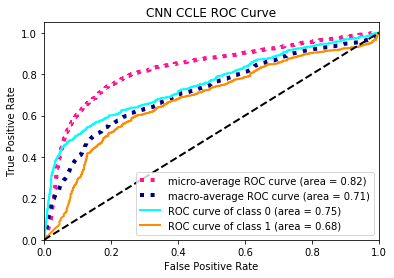

In [49]:
fpr["micro"], tpr["micro"], _ = roc_curve(test_y.ravel(), pre_re_pro.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes-1), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN CCLE ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [51]:
fpr[0] , tpr[0]

(array([0.00000000e+00, 7.55468562e-04, 9.27165963e-04, ...,
        9.92754370e-01, 9.92754370e-01, 1.00000000e+00]),
 array([0.        , 0.1323629 , 0.15741368, ..., 0.99966148, 1.        ,
        1.        ]))

In [52]:
fpr[1] , tpr[1]

(array([0.        , 0.00676788, 0.00969453, ..., 0.9976221 , 0.9976221 ,
        1.        ]),
 array([0.        , 0.17678894, 0.2434982 , ..., 0.99996242, 1.        ,
        1.        ]))

In [53]:
# fpr[2] , tpr[2]

(array([0.00000000e+00, 4.39753738e-04, 5.75062580e-04, ...,
        9.31804343e-01, 9.99932346e-01, 1.00000000e+00]),
 array([0.        , 0.05929168, 0.07122961, ..., 1.        , 1.        ,
        1.        ]))

In [54]:
fpr['micro'],tpr['micro']

(array([0.        , 0.00112237, 0.00151208, ..., 0.9855339 , 0.99996882,
        1.        ]),
 array([0.        , 0.16349182, 0.22207327, ..., 1.        , 1.        ,
        1.        ]))

In [55]:
fpr['macro'], tpr['macro']

(array([0.00000000e+00, 4.39753738e-04, 5.75062580e-04, ...,
        9.97622096e-01, 9.99932346e-01, 1.00000000e+00]),
 array([0.        , 0.04927549, 0.06233529, ..., 1.        , 1.        ,
        1.        ]))

In [50]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_Y_arg, pre_flat, labels=[0,1,2])

array([[ 159,  325,   60],
       [  49, 1781,  440],
       [   0,    0,    0]], dtype=int64)